<a href="https://colab.research.google.com/github/Akshat-Tripathi/AIHack20/blob/master/Cleaning_the_Data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [140]:
"""
Created on Sat Feb 29 13:51:38 2020
@author: Akshat
"""

# Download data - please only run this once
import urllib.request
import zipfile
import os

print("Starting download ...")
urls = [
    "https://github.com/aihack20/shell_challenge/releases/download/data/clean_dataset.zip",
    "https://github.com/aihack20/shell_challenge/releases/download/data/raw_dataset.zip",
]
os.chdir("..")
os.makedirs("shell_data", exist_ok=True)
for url in urls:
    with urllib.request.urlopen(url) as src:
        with open("tmp.zip", "wb") as dest:
            dest.write(src.read())
    print("Unpacking archive ...")
    with zipfile.ZipFile("tmp.zip") as f:
        f.extractall("shell_data")
print("Done!")

Starting download ...
Unpacking archive ...
Unpacking archive ...
Done!


In [0]:
import pandas as pd
clean_data = pd.read_csv("../shell_data/clean_dataset.csv")

In [142]:
clean_data

,Temperature Indicating 0,Flow Rate Difference 1,Flow Rate Indicating 2,Flow Rate Indicating 3,Flow Rate Indicating 4,Flow Rate Indicating 5,Flow Rate Indicating 6,Flow Rate Indicating 7,Flow Rate Indicating 8,Flow Rate Transmitting 9,Flow Rate Transmitting 10,Flow Rate Transmitting 11,Flow Rate Transmitting 12,Flow Rate Actuating Element 13,Flow Rate Solenoid 14,Gauging Difference 15,Time Control Unknown 16,Level Indicating 17,Level Indicating 18,Pressure Controller 19,Pressure Difference 20,Pressure Difference 21,Pressure Difference 22,Pressure Difference 23,Pressure Difference 24,Pressure Difference 25,Pressure Difference 26,Pressure Difference 27,Pressure Difference 28,Pressure Difference 29,Pressure Difference 30,Pressure Difference 31,Pressure Difference 32,Pressure Indicating 33,Pressure Indicating 34,Pressure Indicating 35,Pressure Indicating 36,Pressure Indicating 37,Pressure Indicating 38,Pressure Indicating 39,...,Unknown Solenoid 323,Unknown Solenoid 324,Unknown Solenoid 325,Unknown Solenoid 326,Unknown Solenoid 327,Classified Status 328,Classified Indicating 329,Classified Indicating 330,Classified Indicating 331,Classified Indicating 332,Classified Indicating 333,Classified Indicating 334,Classified Indicating 335,Classified Indicating 336,Unknown Indicating 337,Unknown Indicating 338,Unknown Indicating 339,Unknown Indicating 340,Unknown Indicating 341,Unknown Indicating 342,Flow Rate Difference 343,Flow Rate Indicating 344,Flow Rate Actuating Element 345,Level Emergency Action 346,Pressure Difference 347,Pressure Difference 348,Pressure Difference 349,Pressure Difference 350,Pressure Indicating 351,Pressure Indicating 352,Pressure Indicating 353,Pressure Emergency Action 354,Temperature Controller 355,Temperature Indicating 356,Temperature Indicating 357,Temperature Indicating 358,Temperature Indicating 359,Temperature Indicating 360,Pressure Emergency Action 361,original_index
0,96.026969,134.058575,3.016896,5.499815,27221.60098,72829.950470,227.437532,5.672353,8.660389,259.164053,259.250694,37.604181,32.045362,2.979267,82.339927,0.0,11069.00855,26.312438,2.968154,8.387354,1.561507,0.111407,0.040897,0.017575,-0.009179,0.158100,0.199423,0.002104,4.278127,7.522407,2.926254,17.305795,0.0,2.294762,84.671409,28.102212,85.162853,6.644328,9.880568,7.794782,...,4.774930,11.267856,12.018494,3.600354,4.474426,0.0,4954.638333,7049.545236,16.576476,2096.470083,149.445182,6740.707903,0.703729,0.007709,-0.050000,-0.115212,0.090000,0.08,0.030000,0.0,733.562696,2353.957861,0.000000,46.569746,0.310399,0.361983,0.529558,0.006196,2.292604,27.922524,44.119015,44.053790,29.662350,54.554506,64.945662,25.450283,63.617557,64.978109,43.724690,0
1,95.987510,134.592346,3.020742,5.600833,27179.00250,71681.450820,227.170568,5.670112,8.642001,262.580608,263.893577,37.654943,32.106802,2.966380,82.376430,0.0,11074.03344,26.263372,3.052990,8.304424,1.560687,0.111684,0.041069,0.017791,-0.016854,0.157064,0.199661,0.002104,4.281026,7.480112,2.857404,17.300145,0.0,2.291194,84.703689,28.082687,85.124370,6.632087,9.872420,7.795228,...,4.474426,11.711700,12.018494,3.159676,4.474426,0.0,4938.391538,7019.052236,16.608910,2080.638000,149.340074,6725.873754,0.703762,0.006887,-0.050000,-0.115066,0.090000,0.08,0.030000,0.0,736.089958,2358.574785,0.000000,46.572425,0.307906,0.357844,0.528139,0.008542,2.297546,27.966855,44.053370,44.047508,29.694455,54.828519,64.916624,25.474713,63.724127,65.082058,43.772990,1
2,96.099651,133.920536,3.013397,5.797500,27383.78150,72524.834580,226.903604,5.664165,8.644843,259.783251,260.150397,37.560544,32.005114,2.959470,82.291741,0.0,11065.93960,26.272370,2.999251,8.290051,1.556959,0.111551,0.040897,0.016814,-0.022455,0.156462,0.198392,0.002085,4.279762,7.473612,2.985811,17.305048,0.0,2.286761,84.749601,28.069216,85.139617,6.594814,9.862027,7.806693,...,4.474426,11.328209,12.018494,3.163318,4.474426,0.0,4939.808129,7039.833792,16.619297,2099.810181,149.180346,6742.504121,0.704539,0.012337,-0.050000,-0.118318,0.090000,0.08,0.

In [143]:
clean_data.dropna()

,Temperature Indicating 0,Flow Rate Difference 1,Flow Rate Indicating 2,Flow Rate Indicating 3,Flow Rate Indicating 4,Flow Rate Indicating 5,Flow Rate Indicating 6,Flow Rate Indicating 7,Flow Rate Indicating 8,Flow Rate Transmitting 9,Flow Rate Transmitting 10,Flow Rate Transmitting 11,Flow Rate Transmitting 12,Flow Rate Actuating Element 13,Flow Rate Solenoid 14,Gauging Difference 15,Time Control Unknown 16,Level Indicating 17,Level Indicating 18,Pressure Controller 19,Pressure Difference 20,Pressure Difference 21,Pressure Difference 22,Pressure Difference 23,Pressure Difference 24,Pressure Difference 25,Pressure Difference 26,Pressure Difference 27,Pressure Difference 28,Pressure Difference 29,Pressure Difference 30,Pressure Difference 31,Pressure Difference 32,Pressure Indicating 33,Pressure Indicating 34,Pressure Indicating 35,Pressure Indicating 36,Pressure Indicating 37,Pressure Indicating 38,Pressure Indicating 39,...,Unknown Solenoid 323,Unknown Solenoid 324,Unknown Solenoid 325,Unknown Solenoid 326,Unknown Solenoid 327,Classified Status 328,Classified Indicating 329,Classified Indicating 330,Classified Indicating 331,Classified Indicating 332,Classified Indicating 333,Classified Indicating 334,Classified Indicating 335,Classified Indicating 336,Unknown Indicating 337,Unknown Indicating 338,Unknown Indicating 339,Unknown Indicating 340,Unknown Indicating 341,Unknown Indicating 342,Flow Rate Difference 343,Flow Rate Indicating 344,Flow Rate Actuating Element 345,Level Emergency Action 346,Pressure Difference 347,Pressure Difference 348,Pressure Difference 349,Pressure Difference 350,Pressure Indicating 351,Pressure Indicating 352,Pressure Indicating 353,Pressure Emergency Action 354,Temperature Controller 355,Temperature Indicating 356,Temperature Indicating 357,Temperature Indicating 358,Temperature Indicating 359,Temperature Indicating 360,Pressure Emergency Action 361,original_index
0,96.026969,134.058575,3.016896,5.499815,27221.60098,72829.950470,227.437532,5.672353,8.660389,259.164053,259.250694,37.604181,32.045362,2.979267,82.339927,0.0,11069.00855,26.312438,2.968154,8.387354,1.561507,0.111407,0.040897,0.017575,-0.009179,0.158100,0.199423,0.002104,4.278127,7.522407,2.926254,17.305795,0.0,2.294762,84.671409,28.102212,85.162853,6.644328,9.880568,7.794782,...,4.774930,11.267856,12.018494,3.600354,4.474426,0.0,4954.638333,7049.545236,16.576476,2096.470083,149.445182,6740.707903,0.703729,0.007709,-0.050000,-0.115212,0.090000,0.08,0.030000,0.0,733.562696,2353.957861,0.000000,46.569746,0.310399,0.361983,0.529558,0.006196,2.292604,27.922524,44.119015,44.053790,29.662350,54.554506,64.945662,25.450283,63.617557,64.978109,43.724690,0
1,95.987510,134.592346,3.020742,5.600833,27179.00250,71681.450820,227.170568,5.670112,8.642001,262.580608,263.893577,37.654943,32.106802,2.966380,82.376430,0.0,11074.03344,26.263372,3.052990,8.304424,1.560687,0.111684,0.041069,0.017791,-0.016854,0.157064,0.199661,0.002104,4.281026,7.480112,2.857404,17.300145,0.0,2.291194,84.703689,28.082687,85.124370,6.632087,9.872420,7.795228,...,4.474426,11.711700,12.018494,3.159676,4.474426,0.0,4938.391538,7019.052236,16.608910,2080.638000,149.340074,6725.873754,0.703762,0.006887,-0.050000,-0.115066,0.090000,0.08,0.030000,0.0,736.089958,2358.574785,0.000000,46.572425,0.307906,0.357844,0.528139,0.008542,2.297546,27.966855,44.053370,44.047508,29.694455,54.828519,64.916624,25.474713,63.724127,65.082058,43.772990,1
2,96.099651,133.920536,3.013397,5.797500,27383.78150,72524.834580,226.903604,5.664165,8.644843,259.783251,260.150397,37.560544,32.005114,2.959470,82.291741,0.0,11065.93960,26.272370,2.999251,8.290051,1.556959,0.111551,0.040897,0.016814,-0.022455,0.156462,0.198392,0.002085,4.279762,7.473612,2.985811,17.305048,0.0,2.286761,84.749601,28.069216,85.139617,6.594814,9.862027,7.806693,...,4.474426,11.328209,12.018494,3.163318,4.474426,0.0,4939.808129,7039.833792,16.619297,2099.810181,149.180346,6742.504121,0.704539,0.012337,-0.050000,-0.118318,0.090000,0.08,0.

In [0]:
# A list of time periods (also a list) where is each element is a row of dataframe --> [[index]]
values = clean_data.values
last_index = 0
current_period = [0]
periods = []

for i in range(1,len(values)):
  if last_index == clean_data.iloc[i]['original_index'] - 1:
    current_period.append(i)
    last_index+=1
  else:
    periods.append(current_period)
    current_period = [i]
    last_index = clean_data.iloc[i]['original_index']





In [0]:
for i in periods:
  print(len(i))

In [0]:
#Finding the values strcictly related to the failure

anomaly_indexes = [10634,36136,57280,57618,60545,63144,118665,128524,131118]
variance_column = {}
avg_column ={}


for i in range(len(clean_data.columns)):
  variance_column_anomalies_values[i] = []

for i in range(len(clean_data.columns)):
  variance_column[i] =  clean_data[clean_data.columns[i]].std()**2
  avg_column[i] = clean_data[clean_data.columns[i]].mean()
#_____________________________________________________

variance_column_anomalies_values = {}
avg_column_anomalies ={}
for i in range(len(clean_data.columns)):
  variance_column_anomalies_values[i] = []
  avg_column_anomalies[i] =[]

listy = []

for i in range(len(anomaly_indexes)):
  listy.append(clean_data[clean_data['original_index'] == anomaly_indexes[i]].values)


for j in listy:
  for i in range(len(clean_data.columns)):
    variance_column_anomalies_values[i].append(j[0][i])
    avg_column_anomalies[i].append(j[0][i])



for i in range(len(clean_data.columns)):
  variance_column_anomalies_values[i] =  pd.array(variance_column_anomalies_values[i]).std()**2
  avg_column_anomalies[i] = pd.array(avg_column_anomalies[i]).mean()


avg_column_anomalies

In [182]:
variance_metric = {}
avg_metric = {}
metric ={}

for i in range(len(clean_data.columns)):
  variance_metric[i] = variance_column_anomalies_values[i] /  variance_column[i]
  avg_metric[i] = abs((avg_column[i] - avg_column_anomalies[i])/avg_column[i]) 
  try:
    metric[i] = avg_metric[i]/variance_metric[i]
  except:
     continue 



variance_mapy = {v: k for k, v in sorted(variance_metric.items(), key=lambda item: item[1])}
variance_mapy

for i in variance_mapy.keys():
  variance_mapy[i] = clean_data.columns[variance_mapy[i]]

avg_mapy = {v: k for k, v in sorted(avg_metric.items(), key=lambda item: item[1])}
avg_mapy

for i in avg_mapy.keys():
  avg_mapy[i] = clean_data.columns[avg_mapy[i]]
  

metric_mapy= {v: k for k, v in sorted(metric.items(), key=lambda item: item[1])}
metric_mapy

for i in metric_mapy.keys():
  metric_mapy[i] = clean_data.columns[metric_mapy[i]]

metric_mapy

{1.4919380325223501e-05: 'Classified Indicating 181',
 7.47527692750676e-05: 'Classified Indicating 183',
 0.00010916906568342738: 'Classified Indicating 182',
 0.00014394708249497237: 'Unknown Emergency Action 178',
 0.00016788096756402277: 'Temperature Indicating 114',
 0.0002222011565668626: 'Unknown Solenoid 164',
 0.00022630285018425023: 'Classified Indicating 329',
 0.00022824487151883784: 'Unknown Computing 140',
 0.00027673391415151315: 'Unknown Computing 131',
 0.0003709448881301873: 'Unknown Computing 144',
 0.00038387172728262896: 'Unknown Emergency Action 179',
 0.00045303949844364635: 'Temperature Indicating 115',
 0.0006435881122452819: 'Temperature Indicating 111',
 0.0007237602877666077: 'Flow Rate Transmitting 219',
 0.0007418247024932738: 'Temperature Indicating 99',
 0.000801591306055675: 'Unknown Computing 128',
 0.0008089424118259074: 'Unknown Solenoid 160',
 0.0008157675117211114: 'Temperature Indicating 112',
 0.0008357176543511098: 'Pressure Indicating 49',
 0.0

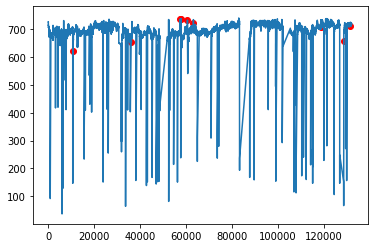

In [191]:
import matplotlib.pyplot as plt
plt.plot(clean_data['original_index'], clean_data['Temperature Indicating 114'])

vals = []

for i in range(len(clean_data.values)):
  if clean_data.iloc[i]['original_index'] in anomaly_indexes:
    vals.append(clean_data.iloc[i]['Temperature Indicating 114'])

plt.scatter(anomaly_indexes, vals, c="red")
